# 3η Εργαστηριακή Άσκηση

###Αστρινάκης Νικόλαος - el17008

###Ταμπακάκης Χρήστος - el17042

##Θεωρητικό Μέρος

### Μέρος 1ο

Σύμφωνα με τα άρθρα, γίνεται προφανής η επίδραση των CNN στο τοπίο της παραδοσιακής επεξεργασίας εικόνας. 

Αναλυτικότερα, τα συνελικτικά δίκτυα επιτυγχάνουν υψηλότερη ακρίβεια σε τομείς όπως η ταξινόμηση εικόνων και η ανίχνευση αντικειμένων.

Ακόμη, τα CNN γίνονται trained για να επιτύχουν το σκοπό τους και δεν είναι προγραμματισμένα να κάνουν πολύπλοκα tasks από την αρχή, όπως οι παραδοσιακοί τρόποι επεξεργασίας εικόνας. Αυτό σημαίνει ότι δεν απαιτούν τόσo fine-tuning και εκμεταλλεύονται την τεράστια ποσότητα δεδομένων που έχουμε στη διάθεση μας, οπότε είναι πιο flexible σε σχέση με τις παραδοσιακές μεθόδους, αφού μπορούν να ξαναγίνουν retrain για να ικανοποιήσουν άλλες απαιτήσεις.

### Μέρος 2ο

Η λειτουργία της ReLU είναι να εφαρμόζεται σε κάθε node του νευρωνικού, που προκύπτει από τον πολλαπλασιασμό των input με τα αντίστοιχα weights και μετά την άθροιση τους, και άν η τιμή αυτή είναι μεγαλύτερη του μηδενός την περνάει στο output, αλλιώς δίνει 0. 

Αναλυτικότερα, η ReLU μπορεί να γραφτεί ώς: $f(input) = max(input, 0)$

### Μέρος 3ο

|                        | LeNet         | AlexNet 	     | VGG 	        |
|------------------------|:-------------:|:-------------:|:------------:|
| Επίπεδα                | 2 Convolutional, 2 Pooling, 2 Normalization, 1 Flatten, 3 Dense         |        5 Convolutional, 3 Pooling, 5 Normalization, 1 Flatten, 1 Dropout, 3 Dense             |  8 Convolutional, 5 Pooling, 8 Normalization,  1 Flatten, 2 Dropout, 3 Dense                    |
| Μέγεθος Φίλτρων        | 5 x 5 Kernel σε όλα τα επίπεδα                  | 11 x 11 στο 1ο επίπεδο, 5 x 5 στο 2ο και 3 x 3 στο 3ο, 4ο και 5ο επίπεδο                  | 3 x 3 σε όλα τα επίπεδα       |
| Συνάρτηση Ενεργοποίησης| Sigmoid       | ReLU          | ReLU         |
| Πλήθος παραμέτρων      | ~60.000       | ~62.000.000   |  Ανάλογα     |
| Τεχνικές Pooling       | 2 x 2 Average Pooling 2D                        | 3 x 3 Max Pooling 2D   | 2 x 2 Max Pooling 2D
| Τεχνικές Dropout       | None          | 0.5 Dropout Rate  |  0.5 Dropout Rate             | 

Για τις **διαφορές** των τριών δικτύων, πρώτη διαφορά είναι το πλήθος των επιπέδων, αφού κάθε ένα από τα δίκτυα έχουν διαφορετικό αριθμό Convolutional, Pooling και Normalization επιπέδων.α

Επόμενη διαφορά είναι το μέγεθος του kernel και η συνάρτηση ενεργοποίησης που χρησιμοποιείται (το LeNet χρησιμοποιεί Sigmoid, ενώ τα AlexNet, VGG χρησιμοποιούν ReLU). 

Ακόμη, έχουν όλα διαφορετική τεχνική Pooling και σε αντίθεση με τα VGG, AlexNet, το LeNet δεν χρησιμοποιεί Dropout.

Για τα **χαρακτηριστικά** που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης, το κύριο είναι η χρήση του ReLU αντί Sigmoid. 

Το ReLU είναι πιό σύγχρονη τεχνική σε σχέση με το Sigmoid, και βοηθάει στην ταχύτερη εκπαίδευση των νευρωνικών και στην καλύτερη απόδοσή τους.

Ακόμη, η χρήση του Dropout βοηθάει στην αποφυγή του Overfitting που μπορεί να προκύψει όταν εκπαιδεύουμε ένα νευρωνικό δίκτυο. Έτσι αυξάνεται η ακρίβεια του δικτύου. 

## Εργαστηριακό Μέρος

###Ερώτημα 1

####Βήμα 1:

Στο πρώτο βήμα της εργασίας αναλαμβάνουμε την δημιουργία των αρχιτεκτονικών που θα χρησιμοποιήσουμε καθώς και την αρχικοποίηση των train, validation και test sets.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


In [ ]:
team_seed = 40

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)
print(x_train_ds[1].shape)

[' baby', ' bowl', ' caterpillar', ' cattle', ' dolphin', ' lamp', ' maple_tree', ' mouse', ' orange', ' pear', ' pine_tree', ' plain', ' porcupine', ' raccoon', ' ray', ' road', ' shark', ' snail', ' tiger', ' tulip']
(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


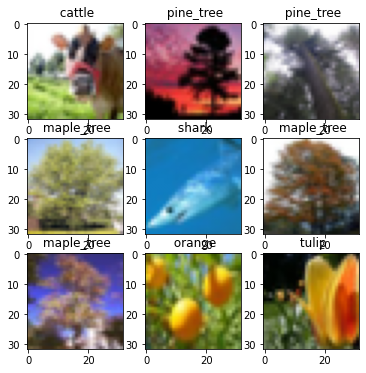

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
def lenet():
    tmp = models.Sequential()
    tmp.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(32,32,3)))
    tmp.add(layers.BatchNormalization())
    tmp.add(layers.AvgPool2D(pool_size=2, strides=2))
    tmp.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
    tmp.add(layers.BatchNormalization())
    tmp.add(layers.AvgPool2D(pool_size=2, strides=2))
    tmp.add(layers.Flatten())
    tmp.add(layers.Dense(120, activation='sigmoid'))  #remember to check these
    tmp.add(layers.Dense(84, activation='sigmoid'))
    tmp.add(layers.Dense(20))
    return tmp

In [ ]:
def get_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(target_list.index(i_[0]))
    index += 1
  return(np.array(filtered_list))

#transform labels to range [0,20)
y_train_new = get_index(y_train, our_index)
y_val_new = get_index(y_val, our_index)
y_test_new = get_index(y_test, our_index)

In [ ]:
def alexnet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=(64,64,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)])

In [ ]:
import cv2

#x_train_resized = np.array((x_train.shape[0], 255, 255, 3))
#x_val_resized = np.array((x_val.shape[0], 255, 255, 3))

x_train_tmp = []
x_val_tmp = []
x_test_tmp = []

for i in range(x_train.shape[0]):
  x_train_tmp.append(cv2.resize(x_train[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC))
for i in range(x_val.shape[0]):
  x_val_tmp.append(cv2.resize(x_val[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC))
for i in range(x_test.shape[0]):
  x_test_tmp.append(cv2.resize(x_test[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC))


x_train_resized = np.array(x_train_tmp)
x_val_resized = np.array(x_val_tmp)
x_test_resized = np.array(x_test_tmp)

In [ ]:
def vgg_block(num_convs, num_channels):
    blk = models.Sequential()
    for _ in range(num_convs):
        blk.add(layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu'))
        blk.add(layers.BatchNormalization())
    blk.add(layers.MaxPool2D(pool_size=2, strides=2))
    return blk

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg():
    conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
    net = models.Sequential()
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(
        models.Sequential([
            layers.Flatten(),
            layers.Dense(4096, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4096, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(20)]))
    return net


In [ ]:
def mycnn():
	model = models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(20, activation='softmax'))
 
	return model

####Βήμα 2: Αξιολόγηση των μοντέλων

In [ ]:
lenet1 = lenet()
lenet2 = lenet()
alexnet1 = alexnet()
alexnet2 = alexnet()
vgg1 = vgg()
vgg2 = vgg()
mycnn1 = mycnn()
mycnn2 = mycnn()

In [ ]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.1)
opt2 = tf.keras.optimizers.SGD(learning_rate=0.3)

In [ ]:
lenet1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
lenet2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

alexnet1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
alexnet2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

vgg1.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
vgg2.compile(optimizer=opt2, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

mycnn1.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
mycnn2.compile(optimizer=opt2, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
hist_len1 = lenet1.fit(x_train, y_train_new, epochs=10, batch_size=256, validation_data=(x_val, y_val_new))
print("-------------------------------------------------")
hist_len2 = lenet2.fit(x_train, y_train_new, epochs=10, batch_size=512, validation_data=(x_val, y_val_new))

Epoch 1/10
34/34 [==============================] - 0s 11ms/step - loss: 1.7545 - accuracy: 0.4649 - val_loss: 2.8945 - val_accuracy: 0.1813
Epoch 2/10
34/34 [==============================] - 0s 8ms/step - loss: 1.7120 - accuracy: 0.4747 - val_loss: 2.8521 - val_accuracy: 0.1600
Epoch 3/10
34/34 [==============================] - 0s 8ms/step - loss: 1.6768 - accuracy: 0.4909 - val_loss: 2.8358 - val_accuracy: 0.1800
Epoch 4/10
34/34 [==============================] - 0s 8ms/step - loss: 1.6471 - accuracy: 0.4975 - val_loss: 2.6183 - val_accuracy: 0.2220
Epoch 5/10
34/34 [==============================] - 0s 7ms/step - loss: 1.6168 - accuracy: 0.5055 - val_loss: 2.4500 - val_accuracy: 0.2673
Epoch 6/10
34/34 [==============================] - 0s 7ms/step - loss: 1.5885 - accuracy: 0.5116 - val_loss: 2.4517 - val_accuracy: 0.2727
Epoch 7/10
34/34 [==============================] - 0s 8ms/step - loss: 1.5591 - accuracy: 0.5231 - val_loss: 2.2839 - val_accuracy: 0.3080
Epoch 8/10
34/34 [=

In [ ]:
hist_alex1 = alexnet1.fit(x_train_resized, y_train_new, epochs=10, batch_size=256, validation_data=(x_val_resized, y_val_new))
print("-------------------------------------------------")
hist_alex2 = alexnet2.fit(x_train_resized, y_train_new, epochs=10, batch_size=512, validation_data=(x_val_resized, y_val_new))

Epoch 1/10
34/34 [==============================] - 6s 103ms/step - loss: 3.0527 - accuracy: 0.1809 - val_loss: 8.2260 - val_accuracy: 0.0613
Epoch 2/10
34/34 [==============================] - 2s 63ms/step - loss: 2.1850 - accuracy: 0.2900 - val_loss: 2.8014 - val_accuracy: 0.1367
Epoch 3/10
34/34 [==============================] - 2s 64ms/step - loss: 2.0083 - accuracy: 0.3513 - val_loss: 2.6005 - val_accuracy: 0.2067
Epoch 4/10
34/34 [==============================] - 2s 65ms/step - loss: 1.8522 - accuracy: 0.4114 - val_loss: 2.7002 - val_accuracy: 0.1700
Epoch 5/10
34/34 [==============================] - 2s 65ms/step - loss: 1.7355 - accuracy: 0.4469 - val_loss: 2.2006 - val_accuracy: 0.3167
Epoch 6/10
34/34 [==============================] - 2s 65ms/step - loss: 1.6414 - accuracy: 0.4774 - val_loss: 2.4136 - val_accuracy: 0.2847
Epoch 7/10
34/34 [==============================] - 2s 65ms/step - loss: 1.4921 - accuracy: 0.5286 - val_loss: 2.2792 - val_accuracy: 0.3107
Epoch 8/10
3

In [ ]:
hist_vgg1 = vgg1.fit(x_train, y_train_new, epochs=10, batch_size=64, validation_data=(x_val, y_val_new))
print("-------------------------------------------------")
hist_vgg2 = vgg2.fit(x_train, y_train_new, epochs=10, batch_size=128, validation_data=(x_val, y_val_new))

Epoch 1/10
133/133 [==============================] - 5s 29ms/step - loss: 2.7095 - accuracy: 0.2255 - val_loss: 3.2075 - val_accuracy: 0.0627
Epoch 2/10
133/133 [==============================] - 4s 27ms/step - loss: 2.0526 - accuracy: 0.3531 - val_loss: 2.7249 - val_accuracy: 0.1960
Epoch 3/10
133/133 [==============================] - 4s 27ms/step - loss: 1.7990 - accuracy: 0.4301 - val_loss: 2.2490 - val_accuracy: 0.3140
Epoch 4/10
133/133 [==============================] - 4s 27ms/step - loss: 1.5957 - accuracy: 0.4975 - val_loss: 2.1529 - val_accuracy: 0.3660
Epoch 5/10
133/133 [==============================] - 4s 27ms/step - loss: 1.4391 - accuracy: 0.5432 - val_loss: 1.7448 - val_accuracy: 0.4713
Epoch 6/10
133/133 [==============================] - 4s 27ms/step - loss: 1.2808 - accuracy: 0.5981 - val_loss: 2.1475 - val_accuracy: 0.3880
Epoch 7/10
133/133 [==============================] - 4s 27ms/step - loss: 1.1240 - accuracy: 0.6469 - val_loss: 2.0979 - val_accuracy: 0.4187

In [ ]:
hist_mycnn1 = mycnn1.fit(x_train, y_train_new, epochs=10, batch_size=64, validation_data=(x_val, y_val_new))
print("-------------------------------------------------")
hist_mycnn2 = mycnn2.fit(x_train, y_train_new, epochs=10, batch_size=128, validation_data=(x_val, y_val_new))

Epoch 1/10
133/133 [==============================] - 2s 11ms/step - loss: 2.4378 - accuracy: 0.2591 - val_loss: 2.6450 - val_accuracy: 0.1993
Epoch 2/10
133/133 [==============================] - 1s 9ms/step - loss: 1.9782 - accuracy: 0.3766 - val_loss: 2.1213 - val_accuracy: 0.3413
Epoch 3/10
133/133 [==============================] - 1s 9ms/step - loss: 1.7876 - accuracy: 0.4385 - val_loss: 1.9339 - val_accuracy: 0.3820
Epoch 4/10
133/133 [==============================] - 1s 9ms/step - loss: 1.6509 - accuracy: 0.4725 - val_loss: 1.6375 - val_accuracy: 0.4927
Epoch 5/10
133/133 [==============================] - 1s 10ms/step - loss: 1.5386 - accuracy: 0.5076 - val_loss: 1.7668 - val_accuracy: 0.4667
Epoch 6/10
133/133 [==============================] - 1s 9ms/step - loss: 1.4442 - accuracy: 0.5392 - val_loss: 1.8008 - val_accuracy: 0.4540
Epoch 7/10
133/133 [==============================] - 1s 10ms/step - loss: 1.3623 - accuracy: 0.5618 - val_loss: 1.4330 - val_accuracy: 0.5560
Epo

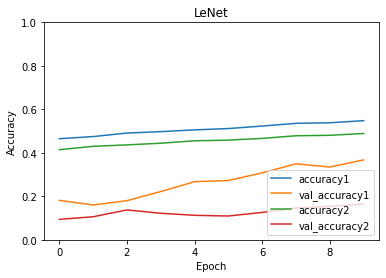

In [ ]:
plt.plot(hist_len1.history['accuracy'], label='accuracy1')
plt.plot(hist_len1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(hist_len2.history['accuracy'], label='accuracy2')
plt.plot(hist_len2.history['val_accuracy'], label = 'val_accuracy2')
plt.title('LeNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

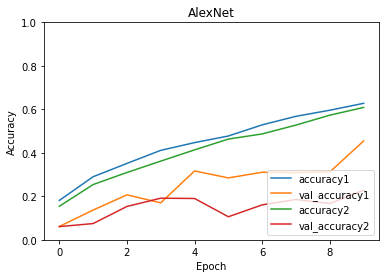

In [ ]:
plt.plot(hist_alex1.history['accuracy'], label='accuracy1')
plt.plot(hist_alex1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(hist_alex2.history['accuracy'], label='accuracy2')
plt.plot(hist_alex2.history['val_accuracy'], label = 'val_accuracy2')
plt.title('AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

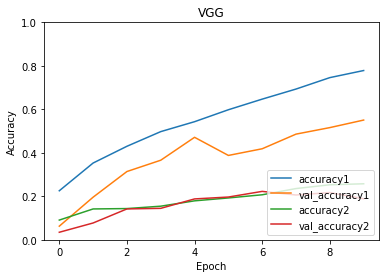

In [ ]:
plt.plot(hist_vgg1.history['accuracy'], label='accuracy1')
plt.plot(hist_vgg1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(hist_vgg2.history['accuracy'], label='accuracy2')
plt.plot(hist_vgg2.history['val_accuracy'], label = 'val_accuracy2')
plt.title('VGG')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

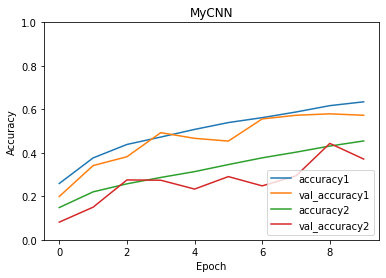

In [ ]:
plt.plot(hist_mycnn1.history['accuracy'], label='accuracy1')
plt.plot(hist_mycnn1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(hist_mycnn2.history['accuracy'], label='accuracy2')
plt.plot(hist_mycnn2.history['val_accuracy'], label = 'val_accuracy2')
plt.title('MyCNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

####Σχολιασμός

Στο παραπάνω χωρίο δοκιμάσαμε 2 διαφορετικούς συνδυασμούς παραμέτρων για κάθε ένα από τα μοντέλα. Προσπαθήσαμε να κρατήσουμε τις περισσότερες μεταβλητές σταθερές μέσα στην κάθε αρχιτεκτονική για να μπορούμε να αποφανθούμε για την επίδραση των υπόλοιπων μεταβλητών στην ορθότητα. Οι 4 παράμετροι για καθένα από τα μοντέλα ήταν ο optimizer, η συνάρτηση loss, ο αριθμός των epochs και το batch size. Να σημειωθεί ότι πειραματιστήκαμε ελαχίστως με την τιμή της συνάρτησης loss, διότι η εκφώνηση της άσκησης δε μας ζητούσε να βγάλουμε συμπεράσματα για αυτήν και αν ήταν μεταβλητή θα στεκόταν εμπόδιο στα συμπεράσματα για τις υπόλοιπες παραμέτρους.

Να σημειωθεί ότι η υλοποίηση μας της αρχιτεκτονικής **VGG** αποτελείται από τα παρακάτω **vgg blocks** της μορφής $(num\_convs, num\_channels)$:

$(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)$

Επίσης η αρχιτεκτονική **MyCNN** αποτελείται από 3 **vgg blocks**, όπου μετά από το καθένα υπάρχει ένα **Dropout layer** με 20% *dropout*.

Παρακάτω παρατίθενται οι μεταβλητές που δοκιμάστηκαν $(optimizer, loss, epochs, batch\_size)$ 


Αρχιτεκτονική LeNet:
  1. Adam, SparseCategoricalEntropy (SCE), 10 256
  2. Adam, SCE, 10, 512

Αρχιτεκτονική AlexNet:
  1. Adam, SCE, 10, 256
  2. Adam, SCE, 10, 512

Αρχιτεκτονική VGG:
  1. Opt1 (SDG με learning rate = 0.1), SCE, 10, 64
  2. Opt2 (SDG με learning rate = 0.3), SCE, 10, 128

Αρχιτεκτονική MyCNN:
  1. Opt1, SCE, 10, 64
  2. Opt2, SCE, 10, 128



####Συμπεράσματα

Από το κάθε μοντέλο κρατάμε την καλύτερη αρχιτεκτονική.

**LeNet1** με *accuracy 55\%*

**AlexNet1** με *accuracy 63\%*

**VGG1** με *accuracy 78\%*

**MyCNN1** με *accuracy 63\%*


Σε κάθε ζευγάρι μοντέλων το πρώτο μοντέλο είχε μισό batch size από το δεύτερο, και μάλιστα στις πρώτες δύο αρχιτεκτονικές (LeNet, AlexNet), το batch size ήταν η μόνη παράμετρος που άλλαζε. Δεδομένου ότι σε κάθε ζευγάρι το πρώτο μοντέλο είχε καλύτερη ορθότητα, μπορούμε να συμπεράνουμε ότι πολύ μεγάλες τιμές batch size δρουν αρνητικά στην ορθότητα του μοντέλου.
Επίσης σημαντικό είναι να σημειωθεί ότι από τους 3 optimizers που δοκιμάστηκαν (Adam, SDG με learning rate 0.1 και SDG με learning rate 0.3) ο opt2 έδειξε καλύτερα αποτελέσματα. Βλέπουμε ότι συγκεκριμένα στην περίπτωση του VGG δύο το αυξημένο learning rate οδήγησε σε σημαντικά μικρότερη ορθότητα. Για αυτό βλέπουμε ότι η αύξηση του learning rate δε βοηθάει τον optimizer, και μάλιστα πάνω από κάποιο όριο η επίδρασή του γίνεται αρνητική.

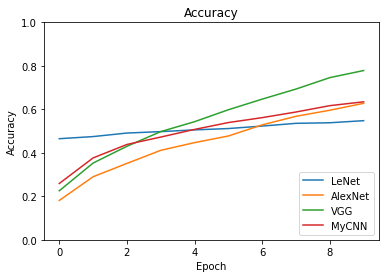

In [ ]:
plt.plot(hist_len1.history['accuracy'], label='LeNet')
plt.plot(hist_alex1.history['accuracy'], label='AlexNet')
plt.plot(hist_vgg1.history['accuracy'], label='VGG')
plt.plot(hist_mycnn1.history['accuracy'], label='MyCNN')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

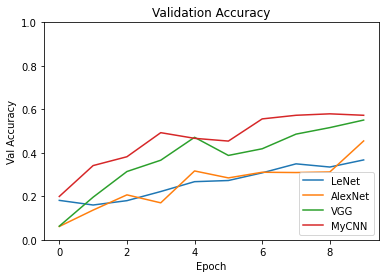

In [ ]:
plt.plot(hist_len1.history['val_accuracy'], label='LeNet')
plt.plot(hist_alex1.history['val_accuracy'], label='AlexNet')
plt.plot(hist_vgg1.history['val_accuracy'], label='VGG')
plt.plot(hist_mycnn1.history['val_accuracy'], label='MyCNN')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

####Βήμα 3: Αξιολόγηση ορθότητας

In [ ]:
print("LeNet")
test_loss_lenet, test_acc_lenet = lenet1.evaluate(x_test,  y_test_new, verbose=2)
print("AlexNet")
test_loss_alex, test_acc_alex = alexnet1.evaluate(x_test_resized, y_test_new, verbose=2)
print("VGG")
test_loss_vgg, test_acc_vgg = vgg1.evaluate(x_test,  y_test_new, verbose=2)
print("MyCNN")
test_loss_mycnn, test_acc_mycnn = mycnn1.evaluate(x_test, y_test_new, verbose=2)

LeNet
63/63 - 0s - loss: 2.0529 - accuracy: 0.3515
AlexNet
63/63 - 0s - loss: 1.7931 - accuracy: 0.4445
VGG
63/63 - 0s - loss: 1.6785 - accuracy: 0.5275
MyCNN
63/63 - 0s - loss: 1.4427 - accuracy: 0.5640


####Αξιολόγηση ορθότητας

Βλέπουμε ότι η ορθότητα των αρχιτεκτονικών στο test set είναι αρκετά χαμηλότερη από την ορθότητα που είχαμε κατά την εκπαίδευση. Αυτό μπορεί να οφείλεται στη διαφορετικότητα των χαρακτηριστικών των εικόνων που απαρτίζουν τα δύο σύνολα. Ωστόσο αφού η επιλογή γίνεται τυχαία μπορούμε να αποκλείσουμε το ενδεχόμενο να υπάρχει κάποιο χαρακτηριστικό που απουσιάζει στο ένα σύνολο και είναι εμφανές στο άλλο.
Η πιο πιθανή εξήγηση είναι ότι η αστοχία του μοντέλου οφείλεται σε overfitting, στην οποία περίπτωση το μοντέλο μας γίνεται πάρα πολύ καλό στο να αναγνωρίζει φωτογραφίες που έχουν στενή ομοιότητα με αυτές του test set και χάνει την ικανότητά του για γενίκευση. Στο επόμενο ερώτημα θα εφαρμόσουμε μερικές τεχνικές που θα βοηθήσουν να αντιμετωπίσουν αυτό το πρόβλημα.

###Ερώτημα 2

####Βήμα 1: Έλεγχος υπερεκπαίδευσης

#####Early Stopping

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs = 100

mycnnstopping = mycnn()

mycnnstopping.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_early_stopping = mycnnstopping.fit(x_train, y_train_new, epochs=epochs, batch_size=64, validation_data=(x_val, y_val_new), callbacks=[earlystopping])

Epoch 1/100
133/133 [==============================] - 2s 11ms/step - loss: 2.4471 - accuracy: 0.2652 - val_loss: 2.2975 - val_accuracy: 0.2727
Epoch 2/100
133/133 [==============================] - 1s 10ms/step - loss: 1.9588 - accuracy: 0.3784 - val_loss: 2.1690 - val_accuracy: 0.3207
Epoch 3/100
133/133 [==============================] - 1s 9ms/step - loss: 1.7860 - accuracy: 0.4324 - val_loss: 1.9365 - val_accuracy: 0.3873
Epoch 4/100
133/133 [==============================] - 1s 9ms/step - loss: 1.6461 - accuracy: 0.4784 - val_loss: 1.7225 - val_accuracy: 0.4633
Epoch 5/100
133/133 [==============================] - 1s 10ms/step - loss: 1.5234 - accuracy: 0.5125 - val_loss: 1.9104 - val_accuracy: 0.4260
Epoch 6/100
133/133 [==============================] - 1s 9ms/step - loss: 1.4170 - accuracy: 0.5504 - val_loss: 1.6403 - val_accuracy: 0.4873
Epoch 7/100
133/133 [==============================] - 1s 9ms/step - loss: 1.3383 - accuracy: 0.5734 - val_loss: 1.4265 - val_accuracy: 0.5

In [ ]:
test_loss_early, test_acc_early = mycnnstopping.evaluate(x_test,  y_test_new, verbose=2)

63/63 - 0s - loss: 1.7897 - accuracy: 0.6820


######Σχολιασμός
Σε αυτό το κομμάτι αναγκαστήκαμε να αυξήσουμε τον αριθμό των epochs πολύ μέχρι να δούμε ότι το Early Stopping είχε επίδραση στην εκπαίδευση. Έχοντας όμως το Early Stopping ενεργό μπορούμε με μεγαλύτερη ευκολία να ορίσουμε αρκετά μεγάλα epochs με τη σιγουριά ότι δε θα χρειαστεί πράγματι να διεκπεραιωθούν όλα. Εδώ όπως βλέπαμε που ορίσαμε epochs=100, χρειάστηκαν μόλις τα μισά μέχρι ο αλγόριθμος να σταματήσει την εκπαίδευση. Στο τέλος βλέπουμε ότι έχουμε φτάσει σε μία πάρα πολύ υψηλή ορθότητα στο μοντέλο μας για το training set, η οποία ωστόσο δεν αντανακλάται στην ορθότητα στο validation και test sets, τα οποία δεν είδαν τόσο δραματική αύξηση.

#####Dropout
Το αρχικο μας μοντέλο ήδη περιείχε dropout layers συνεπώς σε αυτό το σημείο θα εξετάσουμε μια διαφορετική τιμή για το rate αυτών των layers.

In [ ]:
def mycnndrop():
	model = models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.4))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.4))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.4))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.4))
	model.add(layers.Dense(20, activation='softmax'))
 
	return model

In [ ]:
mycnndropout = mycnndrop()

mycnndropout.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_dropout = mycnndropout.fit(x_train, y_train_new, epochs=10, batch_size=64, validation_data=(x_val, y_val_new))

Epoch 1/10
133/133 [==============================] - 2s 11ms/step - loss: 2.8370 - accuracy: 0.1535 - val_loss: 2.5086 - val_accuracy: 0.2107
Epoch 2/10
133/133 [==============================] - 1s 9ms/step - loss: 2.3802 - accuracy: 0.2461 - val_loss: 2.3552 - val_accuracy: 0.2733
Epoch 3/10
133/133 [==============================] - 1s 9ms/step - loss: 2.2080 - accuracy: 0.2958 - val_loss: 2.2385 - val_accuracy: 0.3080
Epoch 4/10
133/133 [==============================] - 1s 9ms/step - loss: 2.0937 - accuracy: 0.3308 - val_loss: 1.9628 - val_accuracy: 0.3567
Epoch 5/10
133/133 [==============================] - 1s 9ms/step - loss: 1.9869 - accuracy: 0.3711 - val_loss: 2.0059 - val_accuracy: 0.3713
Epoch 6/10
133/133 [==============================] - 1s 9ms/step - loss: 1.9237 - accuracy: 0.4011 - val_loss: 2.0832 - val_accuracy: 0.3447
Epoch 7/10
133/133 [==============================] - 1s 9ms/step - loss: 1.8326 - accuracy: 0.4184 - val_loss: 2.1708 - val_accuracy: 0.3653
Epoch

######Σχολιασμός
Βλέπουμε ότι η ορθότητα του νέου μοντέλου είναι χαμηλότερη από την ορθότητα του αρχικού μοντέλου. Συνεπώς η τεχνική Dropout που χρησιμοποιούσαμε ήδη ήταν πιο αποδοτική από την τωρινή, και το rate έχει καταστροφική επίδραση στα αποτελέσματα.

#####Data Augmentation
Σε αυτό το κομμάτι επιλέγουμε αντί να χρησιμοποιήσουμε την τεχνική του image data generation, να χρησιμοποιήσουμε data augmentation. Συνεπώς προσθέτουμε κάποια preprocessing layers στην αρχή του μοντέλου μας τα οποία κάνουν κάποιες τυχαίες παραμορφώσεις στην εικόνα που εξετάζεται πριν περάσει από όλα τα άλλα layers. Κρίναμε απαραίτητο εφόσον χρησιμοποιήσαμε αυτή την τεχνική να αυξήσουμε το πλήθος των epochs, ώστε να μπορέσουν να γίνουν αισθητά τα αποτελέσματα της παραμόρφωσης των εικόνων.

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Resizing(32, 32)
  ]
)

def mycnnaugment ():
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(mycnn())
  return model

In [ ]:
mycnnaug = mycnnaugment()

mycnnaug.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_augment = mycnnaug.fit(x_train, y_train_new, epochs=25, batch_size=64, validation_data=(x_val, y_val_new))

Epoch 1/25
133/133 [==============================] - 3s 12ms/step - loss: 2.5028 - accuracy: 0.2372 - val_loss: 2.3109 - val_accuracy: 0.2567
Epoch 2/25
133/133 [==============================] - 1s 11ms/step - loss: 2.0960 - accuracy: 0.3345 - val_loss: 2.1671 - val_accuracy: 0.3200
Epoch 3/25
133/133 [==============================] - 1s 10ms/step - loss: 1.9468 - accuracy: 0.3865 - val_loss: 1.8711 - val_accuracy: 0.3960
Epoch 4/25
133/133 [==============================] - 1s 10ms/step - loss: 1.8478 - accuracy: 0.4138 - val_loss: 1.8325 - val_accuracy: 0.4087
Epoch 5/25
133/133 [==============================] - 1s 10ms/step - loss: 1.7983 - accuracy: 0.4291 - val_loss: 1.7027 - val_accuracy: 0.4680
Epoch 6/25
133/133 [==============================] - 1s 10ms/step - loss: 1.7204 - accuracy: 0.4531 - val_loss: 1.6562 - val_accuracy: 0.4720
Epoch 7/25
133/133 [==============================] - 1s 10ms/step - loss: 1.6440 - accuracy: 0.4835 - val_loss: 1.8074 - val_accuracy: 0.4647

In [ ]:
test_loss_aug, test_acc_aug = mycnnaug.evaluate(x_test,  y_test_new, verbose=2)

63/63 - 0s - loss: 1.1655 - accuracy: 0.6400


######Σχολιασμός
Μπορούμε να δούμε ότι δεν υπήρξε σημαντική αύξηση στην ορθότητα του μοντέλου μας στο training set. Ωστόσο μια ενδιαφέρουσα παρατήρηση είναι ότι σχεδόν εκμηδενίστηκε η απόκλιση ανάμεσα στην ορθότητα στο training set και στα validation και test sets. Καταλαβαίνουμε ότι πράγματι η τεχνική του data augmentation έδωσε στο μοντέλο μας καλύτερη ικανότητα γενίκευσης και βελτίωσε τις επιδόσεις του σε πολύ σημαντικό βαθμό.

#####Συνδυασμός μεθόδων

In [ ]:
def mycnn2():
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(mycnn())
  return model

mycnnnew = mycnn2()

mycnnnew.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_new = mycnnnew.fit(x_train, y_train_new, epochs=100, batch_size=64, validation_data=(x_val, y_val_new), callbacks=[earlystopping])

Epoch 1/100
133/133 [==============================] - 3s 13ms/step - loss: 2.5746 - accuracy: 0.2499 - val_loss: 2.2543 - val_accuracy: 0.2980
Epoch 2/100
133/133 [==============================] - 1s 10ms/step - loss: 2.0696 - accuracy: 0.3485 - val_loss: 1.9032 - val_accuracy: 0.3980
Epoch 3/100
133/133 [==============================] - 1s 11ms/step - loss: 1.9250 - accuracy: 0.3881 - val_loss: 1.8704 - val_accuracy: 0.4053
Epoch 4/100
133/133 [==============================] - 1s 10ms/step - loss: 1.8363 - accuracy: 0.4136 - val_loss: 1.8615 - val_accuracy: 0.4107
Epoch 5/100
133/133 [==============================] - 1s 10ms/step - loss: 1.7616 - accuracy: 0.4454 - val_loss: 1.8414 - val_accuracy: 0.4300
Epoch 6/100
133/133 [==============================] - 1s 10ms/step - loss: 1.6895 - accuracy: 0.4620 - val_loss: 1.6776 - val_accuracy: 0.4707
Epoch 7/100
133/133 [==============================] - 1s 11ms/step - loss: 1.6425 - accuracy: 0.4749 - val_loss: 1.7713 - val_accuracy:

In [ ]:
test_loss_new, test_acc_new = mycnnnew.evaluate(x_test,  y_test_new, verbose=2)

63/63 - 0s - loss: 1.0727 - accuracy: 0.7075


####Βήμα 2: Αξιολόγηση

Μπορούμε να δούμε ότι όταν το μοντέλο μας χρησιμοποιεί και τις 3 τεχνικές, η ορθότητα στο validation και στο test set συνάδει σε μεγαλύτερο βαθμό με την ορθότητα στο training set. Αξίζει να σημειωθεί ότι το μοντέλο αργεί όπως βλέπουμε πολύ να σταματήσει από Early Stopping, όμως αυτή η καθυστέρηση αποδίδει.
Σε σχέση με το αρχικό MyCNN, τόσο το *val_accuracy* όσο και το *test_accuracy* αυξήθηκαν κατά 19\%.

###Ερώτημα 3

####1. "Παγώμα" της συνελικτικής βάσης και εκπαίδευση της κεφαλής ταξινόμησης

In [ ]:
def sorthead():
  pretrained = tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False)
  pretrained.trainable = False

  model = models.Sequential()
  model.add(pretrained)
  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(20, activation='softmax'))
  return model

In [ ]:
sorthead1 = sorthead()
sorthead1.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_head = sorthead1.fit(x_train, y_train_new, epochs=15, batch_size=64, validation_data=(x_val, y_val_new))

Epoch 1/15
133/133 [==============================] - 3s 16ms/step - loss: 2.2992 - accuracy: 0.2885 - val_loss: 1.9648 - val_accuracy: 0.3753
Epoch 2/15
133/133 [==============================] - 2s 13ms/step - loss: 1.8332 - accuracy: 0.4144 - val_loss: 1.8874 - val_accuracy: 0.4113
Epoch 3/15
133/133 [==============================] - 2s 14ms/step - loss: 1.6737 - accuracy: 0.4693 - val_loss: 1.6705 - val_accuracy: 0.4680
Epoch 4/15
133/133 [==============================] - 2s 14ms/step - loss: 1.5817 - accuracy: 0.4932 - val_loss: 1.5815 - val_accuracy: 0.5113
Epoch 5/15
133/133 [==============================] - 2s 14ms/step - loss: 1.5093 - accuracy: 0.5251 - val_loss: 1.5309 - val_accuracy: 0.5093
Epoch 6/15
133/133 [==============================] - 2s 14ms/step - loss: 1.4478 - accuracy: 0.5369 - val_loss: 1.5411 - val_accuracy: 0.4960
Epoch 7/15
133/133 [==============================] - 2s 14ms/step - loss: 1.4042 - accuracy: 0.5501 - val_loss: 1.5007 - val_accuracy: 0.5293

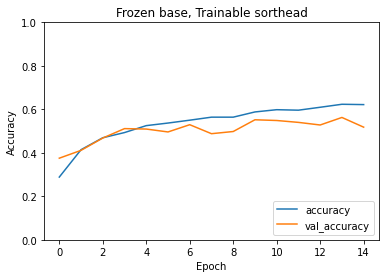

In [ ]:
plt.plot(hist_head.history['accuracy'], label='accuracy')
plt.plot(hist_head.history['val_accuracy'], label = 'val_accuracy')
plt.title('Frozen base, Trainable sorthead')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss_head, test_acc_head = sorthead1.evaluate(x_test,  y_test_new, verbose=2)

63/63 - 1s - loss: 1.5065 - accuracy: 0.5345


####2. Εκπαίδευση μόνο ενός ποσοστού των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου.

In [ ]:
print(len(tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False).layers))

19


In [ ]:
def halftrain():
  model = models.Sequential()
  pretrained = tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False)
  for i in range(8):
    pretrained.layers[i].trainable = False
  
  model.add(pretrained)
  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(20, activation='softmax'))
  return model

In [ ]:
halftrain1 = halftrain()
halftrain1.compile(optimizer=opt1, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

hist_half = halftrain1.fit(x_train, y_train_new, epochs=15, batch_size=64, validation_data=(x_val, y_val_new))

Epoch 1/15
133/133 [==============================] - 5s 31ms/step - loss: 2.9742 - accuracy: 0.0832 - val_loss: 2.9033 - val_accuracy: 0.1053
Epoch 2/15
133/133 [==============================] - 4s 29ms/step - loss: 2.8137 - accuracy: 0.1244 - val_loss: 2.6168 - val_accuracy: 0.1480
Epoch 3/15
133/133 [==============================] - 4s 30ms/step - loss: 2.4795 - accuracy: 0.1904 - val_loss: 2.0440 - val_accuracy: 0.3293
Epoch 4/15
133/133 [==============================] - 4s 30ms/step - loss: 2.2631 - accuracy: 0.2784 - val_loss: 3.1341 - val_accuracy: 0.1113
Epoch 5/15
133/133 [==============================] - 4s 30ms/step - loss: 2.0843 - accuracy: 0.3169 - val_loss: 2.6858 - val_accuracy: 0.2893
Epoch 6/15
133/133 [==============================] - 4s 30ms/step - loss: 2.2144 - accuracy: 0.3232 - val_loss: 2.1301 - val_accuracy: 0.3507
Epoch 7/15
133/133 [==============================] - 4s 30ms/step - loss: 1.7720 - accuracy: 0.4278 - val_loss: 1.8037 - val_accuracy: 0.4113

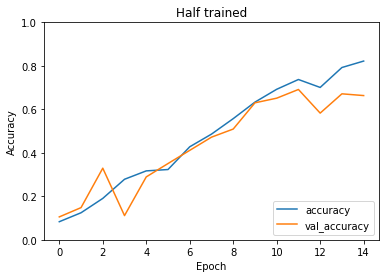

In [ ]:
plt.plot(hist_half.history['accuracy'], label='accuracy')
plt.plot(hist_half.history['val_accuracy'], label = 'val_accuracy')
plt.title('Half trained')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss_half, test_acc_half = halftrain1.evaluate(x_test,  y_test_new, verbose=2)

63/63 - 1s - loss: 1.3300 - accuracy: 0.6660


####3. Αξιολόγηση αποτελεσμάτων

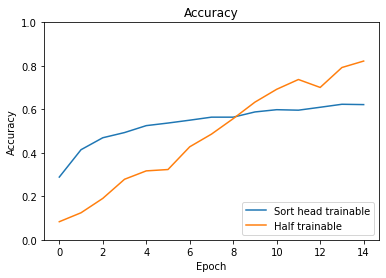

In [ ]:
plt.plot(hist_head.history['accuracy'], label='Sort head trainable')
plt.plot(hist_half.history['accuracy'], label = 'Half trainable')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

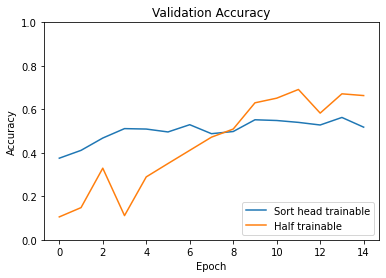

In [ ]:
plt.plot(hist_head.history['val_accuracy'], label='Sort head trainable')
plt.plot(hist_half.history['val_accuracy'], label = 'Half trainable')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

######Σχολιασμός
Βλέπουμε ότι και οι δύο τεχνικές παρέχουν έναν εύκολο τρόπο να δώσεις μια γερή εκκίνηση στην εκπαίδευση ενός μοντέλου άμα δεν έχεις επαρκές training set. Όσον αφορά τις δύο μεθόδους μπορούμε να δούμε ότι η δεύτερη είναι σίγουρα πιο αποδοτική, και η διαφορά αυτή γίνεται αισθητή γύρω στο 8ο epoch. Ωστόσο για μικρό αριθμό epochs η τεχνική της εκπαίδευσης μόνο της κεφαλής ταξινόμησης έχει πολύ μεγάλο πλεονέκτημα το οποίο φθίνει, και αυτό είναι αναμενόμενο. Εφόσον το δεύτερο μοντέλο είναι trainable σε περισσότερα επίπεδα, μπορεί να κάνει μεγαλύτερη πρόοδο όσο εκπαιδεύεται σε σχέση με το πρώτο μοντέλο, με την προϋπόθεση ότι τα δεδομένα επαρκούν. Αν τα data sets μας ήταν αρκετά μικρότερα πολύ πιθανόν η πρώτη τεχνική να διατηρούσε το πλεονέκτημά της, καθώς το *trainability* του δεύτερου μοντέλου θα ήταν μειονέκτημα σε ένα τέτοιο περιβάλλον.